In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from Approximators import BernsteinLegendre, Bernstein
from Approximators.Polynomials import LegendrePolynomial, ChebyshevPolynomial

In [3]:
f = lambda x: np.sqrt(abs(x - 0.5))

In [4]:
n = 6
optimizer = Bernstein.CauchySimplex(n=n, m=n, verbose=True)

x = np.linspace(0, 1, 200)
y = f(x)

optimizer.fit(x, y);

4: 1.0220939765117452e-07


In [5]:
x_vals = np.linspace(0, 1, 1000)

legendre_diff = optimizer.denominator(x_vals) - optimizer.w_as_legendre_coef() @ LegendrePolynomial(n, x_vals)
np.max(abs(legendre_diff))

4.218847493575595e-15

In [6]:
chebyshev_diff = optimizer.denominator(x_vals) - optimizer.w_as_chebyshev_coef() @ ChebyshevPolynomial(n, x_vals)
np.max(abs(chebyshev_diff))

5.245803791353865e-15

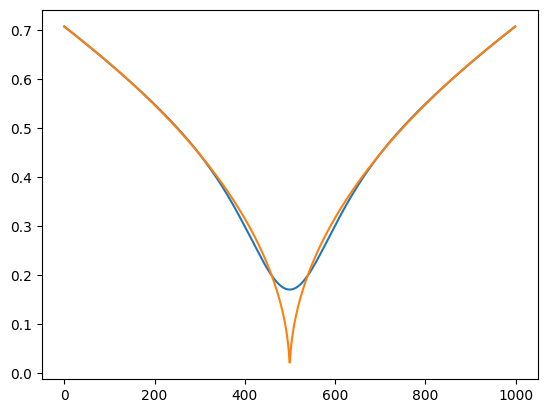

In [7]:
plt.plot(optimizer(x_vals))
plt.plot(f(x_vals))